In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import sys
import scipy
import numpy as np
import sklearn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.utils import resample

## Activities

In [2]:
dataset_WGS_Other_act = pd.read_csv('./project_data/activities/WGS/WGS_Other.activities.csv')
print(dataset_WGS_Other_act.shape)

(1865, 68)


In [3]:
dataset_WGS_PCAWG_act = pd.read_csv('./project_data/activities/WGS/WGS_PCAWG.activities.csv')
print(dataset_WGS_PCAWG_act.shape)

(2780, 68)


In [4]:
dataset_WES_Other_act = pd.read_csv('./project_data/activities/WES/WES_Other.activities.csv')
print(dataset_WES_Other_act.shape)

(9691, 68)


In [5]:
dataset_WES_TCGA_act = pd.read_csv('./project_data/activities/WES/WES_TCGA.activities.csv')
print(dataset_WES_TCGA_act.shape)

(9493, 68)


## Catalogs

In [6]:
nonPCAWG_wgs_mut = pd.read_csv('./project_data/catalogs/WGS/WGS_Other.96.csv')

In [7]:
PCAWG_wgs_mut = pd.read_csv('./project_data/catalogs/WGS/WGS_PCAWG.96.csv')

In [8]:
dataset_WES_Other_act = pd.read_csv('./project_data/catalogs/WES/WES_Other.96.csv')
print(dataset_WES_Other_act.shape)

(96, 9693)


In [9]:
dataset_WES_TCGA_act = pd.read_csv('./project_data/catalogs/WES/WES_TCGA.96.csv')
print(dataset_WES_TCGA_act.shape)

(96, 9495)


In [10]:
### Aggregate mutation type and trinucleotides to one column
PCAWG_wgs_mut['tri_mut'] = PCAWG_wgs_mut[['Mutation type', 'Trinucleotide']].agg('_'.join, axis=1)
# 
nonPCAWG_wgs_mut['tri_mut'] = nonPCAWG_wgs_mut[['Mutation type', 'Trinucleotide']].agg('_'.join, axis=1)
# Concatenate both mutation count data sets
#total_wgs_mut = pd.concat([PCAWG_wgs_mut, nonPCAWG_wgs_mut], axis=1)
#total_wgs_mut.shape
#(96, 4651)
### Get cancer types
new_list = [re.sub(r'\:.*', '', i) for i in PCAWG_wgs_mut.columns]
# Transpose
PCAWG_wgs_mut_T = PCAWG_wgs_mut.T
# Rename columns
PCAWG_wgs_mut_T.columns = PCAWG_wgs_mut["tri_mut"]
PCAWG_wgs_mut_T["label"] = new_list[:]
PCAWG_wgs_mut_T = PCAWG_wgs_mut_T.iloc[2:,:] # we don't need to first 2 rows

In [11]:
PCAWG_wgs_mut_T

tri_mut,C>A_ACA,C>A_ACC,C>A_ACG,C>A_ACT,C>A_CCA,C>A_CCC,C>A_CCG,C>A_CCT,C>A_GCA,C>A_GCC,...,T>G_CTT,T>G_GTA,T>G_GTC,T>G_GTG,T>G_GTT,T>G_TTA,T>G_TTC,T>G_TTG,T>G_TTT,label
Biliary-AdenoCA::SP117655,269,148,25,154,215,148,27,180,165,76,...,268,19,17,43,89,83,48,63,197,Biliary-AdenoCA
Biliary-AdenoCA::SP117556,114,56,13,70,63,49,7,69,81,37,...,53,8,5,20,15,26,10,31,64,Biliary-AdenoCA
Biliary-AdenoCA::SP117627,105,71,13,73,71,55,8,61,61,50,...,44,7,6,14,14,16,8,15,52,Biliary-AdenoCA
Biliary-AdenoCA::SP117775,217,123,29,126,129,82,26,143,162,84,...,132,21,7,28,34,38,30,53,122,Biliary-AdenoCA
Biliary-AdenoCA::SP117332,52,36,8,31,30,22,10,38,21,25,...,18,2,4,7,7,15,8,16,38,Biliary-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uterus-AdenoCA::SP91265,404,255,52,281,339,170,52,261,264,137,...,230,57,32,97,118,83,49,108,223,Uterus-AdenoCA
Uterus-AdenoCA::SP89909,97,78,14,80,204,390,92,876,77,62,...,76,10,7,10,24,19,17,34,106,Uterus-AdenoCA
Uterus-AdenoCA::SP90629,250,188,49,202,194,124,28,150,142,95,...,197,42,35,72,113,108,92,103,270,Uterus-AdenoCA
Uterus-AdenoCA::SP95550,170,137,32,116,127,100,17,120,108,72,...,62,25,13,61,32,29,33,42,89,Uterus-AdenoCA


In [12]:
PCAWG_wgs_mut_T

tri_mut,C>A_ACA,C>A_ACC,C>A_ACG,C>A_ACT,C>A_CCA,C>A_CCC,C>A_CCG,C>A_CCT,C>A_GCA,C>A_GCC,...,T>G_CTT,T>G_GTA,T>G_GTC,T>G_GTG,T>G_GTT,T>G_TTA,T>G_TTC,T>G_TTG,T>G_TTT,label
Biliary-AdenoCA::SP117655,269,148,25,154,215,148,27,180,165,76,...,268,19,17,43,89,83,48,63,197,Biliary-AdenoCA
Biliary-AdenoCA::SP117556,114,56,13,70,63,49,7,69,81,37,...,53,8,5,20,15,26,10,31,64,Biliary-AdenoCA
Biliary-AdenoCA::SP117627,105,71,13,73,71,55,8,61,61,50,...,44,7,6,14,14,16,8,15,52,Biliary-AdenoCA
Biliary-AdenoCA::SP117775,217,123,29,126,129,82,26,143,162,84,...,132,21,7,28,34,38,30,53,122,Biliary-AdenoCA
Biliary-AdenoCA::SP117332,52,36,8,31,30,22,10,38,21,25,...,18,2,4,7,7,15,8,16,38,Biliary-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uterus-AdenoCA::SP91265,404,255,52,281,339,170,52,261,264,137,...,230,57,32,97,118,83,49,108,223,Uterus-AdenoCA
Uterus-AdenoCA::SP89909,97,78,14,80,204,390,92,876,77,62,...,76,10,7,10,24,19,17,34,106,Uterus-AdenoCA
Uterus-AdenoCA::SP90629,250,188,49,202,194,124,28,150,142,95,...,197,42,35,72,113,108,92,103,270,Uterus-AdenoCA
Uterus-AdenoCA::SP95550,170,137,32,116,127,100,17,120,108,72,...,62,25,13,61,32,29,33,42,89,Uterus-AdenoCA


In [13]:
X = PCAWG_wgs_mut_T.drop('label', axis=1).drop('tri_mut',axis=0).copy()
X

tri_mut,C>A_ACA,C>A_ACC,C>A_ACG,C>A_ACT,C>A_CCA,C>A_CCC,C>A_CCG,C>A_CCT,C>A_GCA,C>A_GCC,...,T>G_CTG,T>G_CTT,T>G_GTA,T>G_GTC,T>G_GTG,T>G_GTT,T>G_TTA,T>G_TTC,T>G_TTG,T>G_TTT
Biliary-AdenoCA::SP117655,269,148,25,154,215,148,27,180,165,76,...,49,268,19,17,43,89,83,48,63,197
Biliary-AdenoCA::SP117556,114,56,13,70,63,49,7,69,81,37,...,23,53,8,5,20,15,26,10,31,64
Biliary-AdenoCA::SP117627,105,71,13,73,71,55,8,61,61,50,...,8,44,7,6,14,14,16,8,15,52
Biliary-AdenoCA::SP117775,217,123,29,126,129,82,26,143,162,84,...,43,132,21,7,28,34,38,30,53,122
Biliary-AdenoCA::SP117332,52,36,8,31,30,22,10,38,21,25,...,8,18,2,4,7,7,15,8,16,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uterus-AdenoCA::SP92931,139,75,13,68,69,52,16,55,73,32,...,23,82,8,9,14,23,19,13,25,66
Uterus-AdenoCA::SP91265,404,255,52,281,339,170,52,261,264,137,...,88,230,57,32,97,118,83,49,108,223
Uterus-AdenoCA::SP89909,97,78,14,80,204,390,92,876,77,62,...,75,76,10,7,10,24,19,17,34,106
Uterus-AdenoCA::SP90629,250,188,49,202,194,124,28,150,142,95,...,87,197,42,35,72,113,108,92,103,270


In [14]:
y = PCAWG_wgs_mut_T['label'][0:-1].copy()
y

Biliary-AdenoCA::SP117655    Biliary-AdenoCA
Biliary-AdenoCA::SP117556    Biliary-AdenoCA
Biliary-AdenoCA::SP117627    Biliary-AdenoCA
Biliary-AdenoCA::SP117775    Biliary-AdenoCA
Biliary-AdenoCA::SP117332    Biliary-AdenoCA
                                  ...       
Uterus-AdenoCA::SP92931       Uterus-AdenoCA
Uterus-AdenoCA::SP91265       Uterus-AdenoCA
Uterus-AdenoCA::SP89909       Uterus-AdenoCA
Uterus-AdenoCA::SP90629       Uterus-AdenoCA
Uterus-AdenoCA::SP95550       Uterus-AdenoCA
Name: label, Length: 2780, dtype: object

mean = 0, deviation = 1:

In [15]:
scaled_X = scale(X)
print(scaled_X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_X,y, random_state=42)

In [16]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

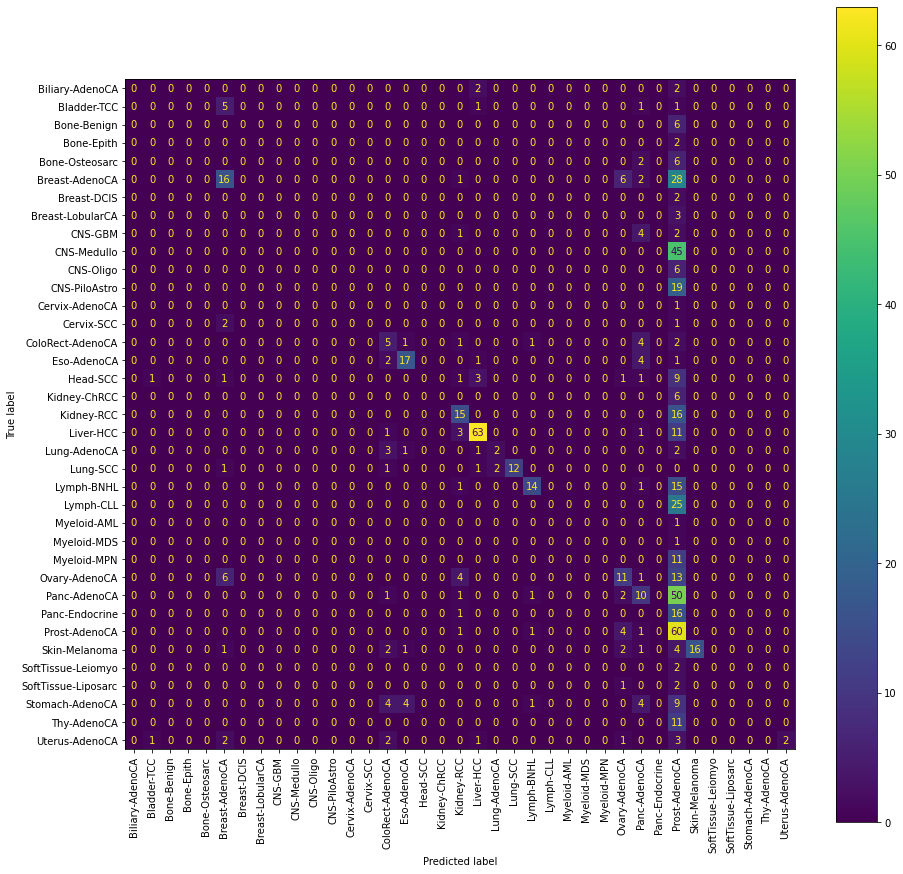

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format = 'd', xticks_rotation = 'vertical', ax=ax)
plt.show()

Cross validation

In [18]:
param_grid = [{ 'C':[0.5, 1, 10, 100], 
               'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] },
             ]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring='accuracy',
    verbose = 0
)
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

/home/milla/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [42]:
clf_svm = SVC(random_state=42, C=1, gamma = 0.1)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

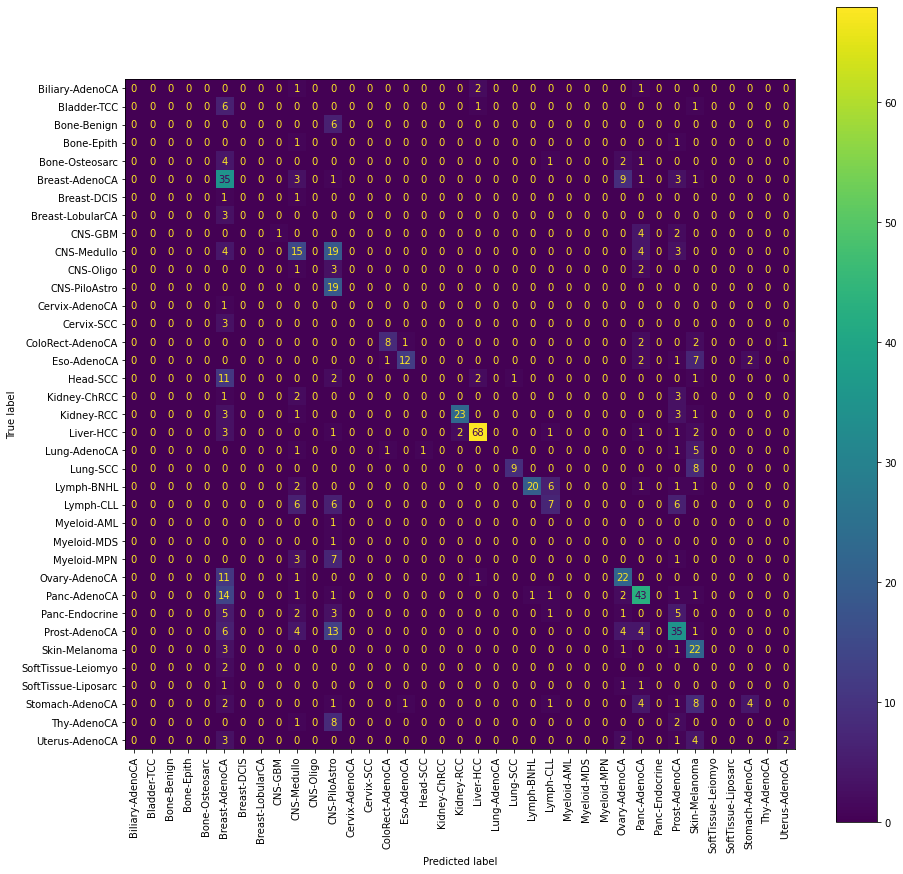

In [43]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format = 'd', xticks_rotation = 'vertical', ax=ax)
plt.show()

Pricipal componen analysis

In [21]:
len(PCAWG_wgs_mut_T.columns)

97

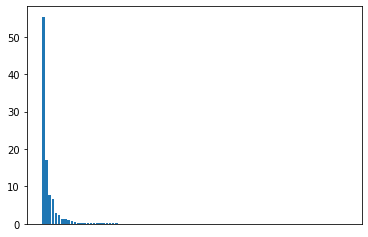

In [22]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) +1)]

plt.bar(x = range(1,len(per_var)+1), height= per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)
plt.show()

In [23]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [{ 'C':[1, 10, 100, 1000], 
               'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'] },
             ]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring='accuracy',
    verbose = 0
)
optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

/home/milla/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [24]:
clf_svm = SVC(random_state=42, C=1000, gamma = 1)
clf_svm.fit(pca_train_scaled, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() -1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() -1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1), 
                    np.arange(start = y_min, stop= y_max, step=0.1))

array([[ -3.68188561,  -3.58188561,  -3.48188561, ..., 189.11811439,
        189.21811439, 189.31811439],
       [ -3.68188561,  -3.58188561,  -3.48188561, ..., 189.11811439,
        189.21811439, 189.31811439],
       [ -3.68188561,  -3.58188561,  -3.48188561, ..., 189.11811439,
        189.21811439, 189.31811439],
       ...,
       [ -3.68188561,  -3.58188561,  -3.48188561, ..., 189.11811439,
        189.21811439, 189.31811439],
       [ -3.68188561,  -3.58188561,  -3.48188561, ..., 189.11811439,
        189.21811439, 189.31811439],
       [ -3.68188561,  -3.58188561,  -3.48188561, ..., 189.11811439,
        189.21811439, 189.31811439]])

In [27]:
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

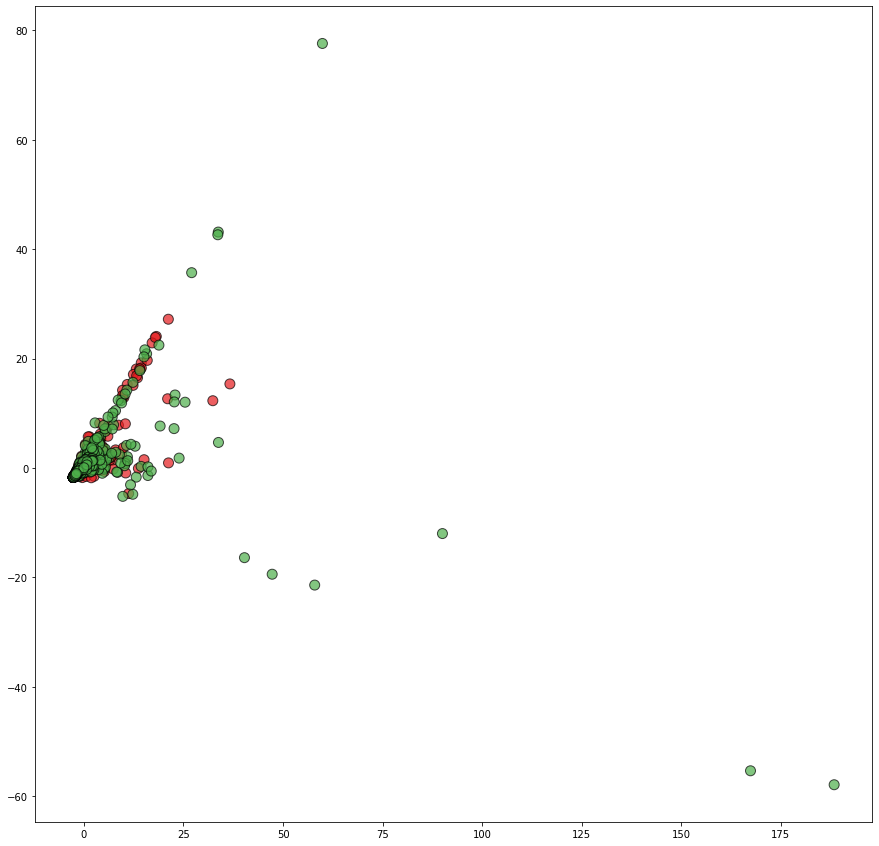

In [31]:
#ax.contourf(xx, yy, Z, alpha = 0.1)
cmap =  colors.ListedColormap(['#e41a1c', '#4daf4a'])
plt.figure(figsize=(15, 15))
plt.scatter(test_pc1_coords, test_pc2_coords,  c=[x for x in range(len(y_train))], cmap=cmap, s=100, edgecolors='k', alpha=0.7)
plt.show()

In [ ]:
# c=[x for x in range(len(y_train))]